In [1]:
import pandas as pd
import numpy as np

In [2]:
compdata = pd.read_csv("./data/sp500_companies.csv")
indexdata = pd.read_csv("./data/sp500_index.csv")
stockdata = pd.read_csv("./data/sp500_stocks.csv")

In [16]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [18]:
stockdata

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,46.422302,69.414719,69.774246,69.122070,69.473244,3640265.0
1,2010-01-05,MMM,46.131523,68.979935,69.590302,68.311035,69.230766,3405012.0
2,2010-01-06,MMM,46.785759,69.958191,70.735786,69.824417,70.133781,6301126.0
3,2010-01-07,MMM,46.819294,70.008362,70.033447,68.662209,69.665550,5346240.0
4,2010-01-08,MMM,47.149204,70.501671,70.501671,69.648827,69.974915,4073337.0
...,...,...,...,...,...,...,...,...
1878700,2024-10-29,ZTS,180.841476,181.270004,184.410004,181.039993,182.009995,1696000.0
1878701,2024-10-30,ZTS,182.307999,182.740005,183.809998,179.800003,179.919998,1957800.0
1878702,2024-10-31,ZTS,178.779999,178.779999,181.580002,178.740005,180.220001,2120000.0
1878703,2024-11-01,ZTS,181.949997,181.949997,183.110001,179.199997,179.979996,2838600.0


<Axes: xlabel='Date'>

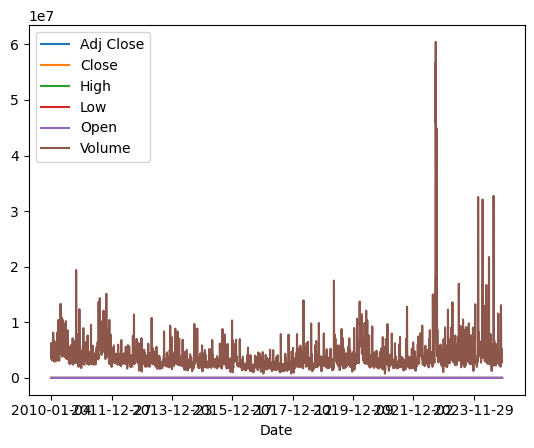

In [23]:
stockdata.loc[stockdata.Symbol=="MMM"].plot(x="Date")

In [14]:
# function to plot: day, 5 days, 30 days
def plot_stock_graph():
    
    return 0

503